## Lab Exercise Week \#3: Decision Trees in Machine Learning

### Objective:
The goal of this lab exercise is to understand Decision Trees and their application in machine learning. You will apply a decition tree classifier to different datasets and plot the resulting trees.

### Datasets:
For this lab exercise, you'll use the ApplePears, AthleteSelection and Restaurant datasets from Brightspace.

### Tasks:

#### 1). Data Loading and Exploration:
<ul>
<li>Import all needed libraries.</li>
<li>Load the ApplePears dataset.</li>
<li>Explore the dataset to understand its structure and features.</li>
<li>Select approprate features for a decision tree.</li>
</ul>

In [35]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [18]:
path = './'
df=pd.read_csv(os.path.join(path, "./ApplesPears.csv"), encoding = "ISO-8859-1")

print(df.shape)
print(df.info())


(10, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Greeness  10 non-null     int64  
 1   Height    10 non-null     int64  
 2   Width     10 non-null     int64  
 3   Taste     10 non-null     object 
 4   Weight    10 non-null     int64  
 5   H/W       10 non-null     float64
 6   Class     10 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 692.0+ bytes
None


In [19]:

df.head(10) 
# df.info

,Greeness,Height,Width,Taste,Weight,H/W,Class
0,210,60,62,Sweet,186,0.97,Apple
1,220,70,53,Sweet,180,1.32,Pear
2,215,55,50,Tart,152,1.10,Apple
3,180,76,40,Sweet,152,1.90,Pear
4,220,68,45,Sweet,153,1.51,Pear
5,160,65,68,Sour,221,0.96,Apple
6,215,63,45,Sweet,140,1.40,Pear
7,180,55,56,Sweet,154,0.98,Apple
8,220,68,65,Tart,221,1.05,Apple
9,190,60,58,Sour,174,1.03,Apple


scikit-learn can deal with a category class label but it cannot deal with categorical features.
So we drop the Taste feature.

See later in the notebook for how to deal with categorical features

In [20]:
df = df.drop(columns=["Taste"])
print(df.shape)
print(df.info())
df.head(5)

(10, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Greeness  10 non-null     int64  
 1   Height    10 non-null     int64  
 2   Width     10 non-null     int64  
 3   Weight    10 non-null     int64  
 4   H/W       10 non-null     float64
 5   Class     10 non-null     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 612.0+ bytes
None


,Greeness,Height,Width,Weight,H/W,Class
0,210,60,62,186,0.97,Apple
1,220,70,53,180,1.32,Pear
2,215,55,50,152,1.10,Apple
3,180,76,40,152,1.90,Pear
4,220,68,45,153,1.51,Pear


#### 2) Decision Tree for Apples and Pears:
<ul>
<li>Create a decision tree classifier.</li>
<li>Train your model.</li>
<li>Predict the outcome.</li>
<li>Plot the decision tree model.</li>
</ul>

In [26]:
#Create a decision tree classifier.
# create feature set and a target variable / label
X = df.drop(columns=["Class"])
y = df["Class"]

print(f" X shape is {X.shape}")
print(f" y shape is {y.shape}")
print("input columns", X.columns)
print("output columns", y.name)

 X shape is (10, 5)
 y shape is (10,)
input columns Index(['Greeness', 'Height', 'Width', 'Weight', 'H/W'], dtype='object')
output columns Class


In [ ]:
# Train your model.
# # Split (small dataset, so keep it simple)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
# fit the model
clf.fit(X_train, y_train)

print("shapes of training and testing")
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

shapes of training and testing
X_train shape: (8, 5)
y_train shape: (8,)
X_test shape: (2, 5)
y_test shape: (2,)


In [30]:
# predict - use trained model to predicy the outcome of test set
y_pred = clf.predict(X_test)

print("Predictions:", y_pred)
print("Actual values:", y_test.values)

Predictions: ['Apple' 'Pear']
Actual values: ['Apple' 'Pear']


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# see prediction probabilities 
clf.predict_proba(X_test)


Accuracy: 1.0


array([[1., 0.],
       [0., 1.]])

In [34]:

# Want to check overfitting? - --If both are 1.0 → the tree perfectly memorised the small dataset.
print("Training accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))


Training accuracy: 1.0
Test accuracy: 1.0


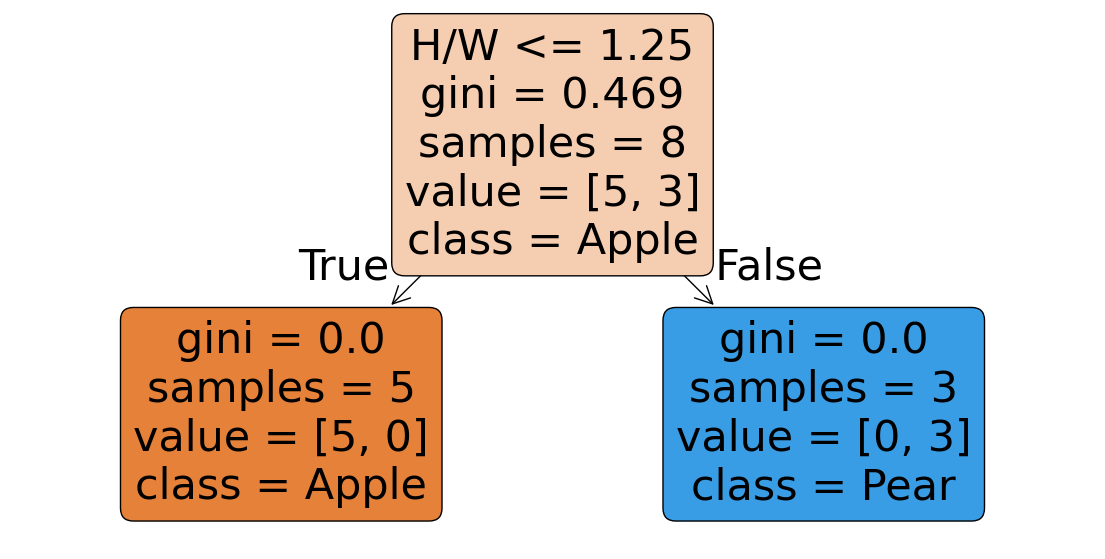

In [36]:
# Plot the decision tree model
plt.figure(figsize=(14,7))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True, 
    rounded=True
)
plt.tight_layout
plt.show()

Two key methods:
1. `fit` method will train the tree from the data.
2. `predict` method will produce class predictions for an array of test data. 

#### 3) Decision Tree for Athletes:
<ul>
<li>Load the AthleteSelection.csv dataset</li>
<li>Create a decision tree classifier.</li>
<li>Train your model.</li>
<li>Predict the outcome.</li>
<li>Plot the decision tree model.</li>
</ul>

Run a test example, select one of the training examples

#### 4) Decision Tree for Restaurants:
<ul>
    <li>Import the restaurant.csv dataset</li>
    <li>Use one-hot encoding to deal with categorical features.</li>
<li>Create a decision tree classifier.</li>
<li>Train your model.</li>
<li>Plot the decision tree model.</li>
</ul>